In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import os
import igraph as ig
import arw
import utils
import random
import time

### Load network dataset and extract ARW input data

In [65]:
path = './datasets/acl.pkl'
network = ig.Graph.Read_Pickle(path)
print (network.summary())

attr = 'single_attr' if network['attributed'] else None
input_data = utils.extract_arw_input_data(network, 'time', 0.00, 0.05, debug=False, attrs=attr)

IGRAPH DN-- 18665 115311 -- 
+ attr: attributed (g), attributes (g), single_attr (g), attrs (v), id (v), name (v), single_attr (v), time (v), venue_id (v)


### Generate ARW graph with fitted parameters

In [66]:
params = dict(p_diff=0.08, p_same=0.06, jump=0.42, out=1.0)

arw_graph = arw.RandomWalkSingleAttribute(params['p_diff'], params['p_same'], 
                                          params['jump'], params['out'], 
                                          input_data['gpre'], attr_name=attr)

arw_graph.add_nodes(input_data['chunk_sizes'], input_data['mean_outdegs'], 
                    chunk_attr_sampler=input_data['chunk_sampler'] if attr else None)

Total chunks: 44
3 7 11 15 19 23 27 31 35 39 43 
IGRAPH D--- 18665 118804 -- 
+ attr: chunk_id (v), single_attr (v)


### Compare graph statistics

Attribute Assortativity:
ARW: 0.065
Dataset: 0.067


(<Figure size 1800x432 with 3 Axes>,
 (<AxesSubplot:title={'center':'In-degree Distribution'}, xlabel='indegree $k$', ylabel='$\\Pr(K \\geq k)$'>,
  <AxesSubplot:title={'center':'Local Clustering Inverse CDF'}, xlabel='Local Clustering Coefficient c', ylabel='$\\Pr(C \\geq c)$'>,
  <AxesSubplot:title={'center':'Average Local Clustering and Indegree'}, xlabel='indegree', ylabel='avg clustering'>))

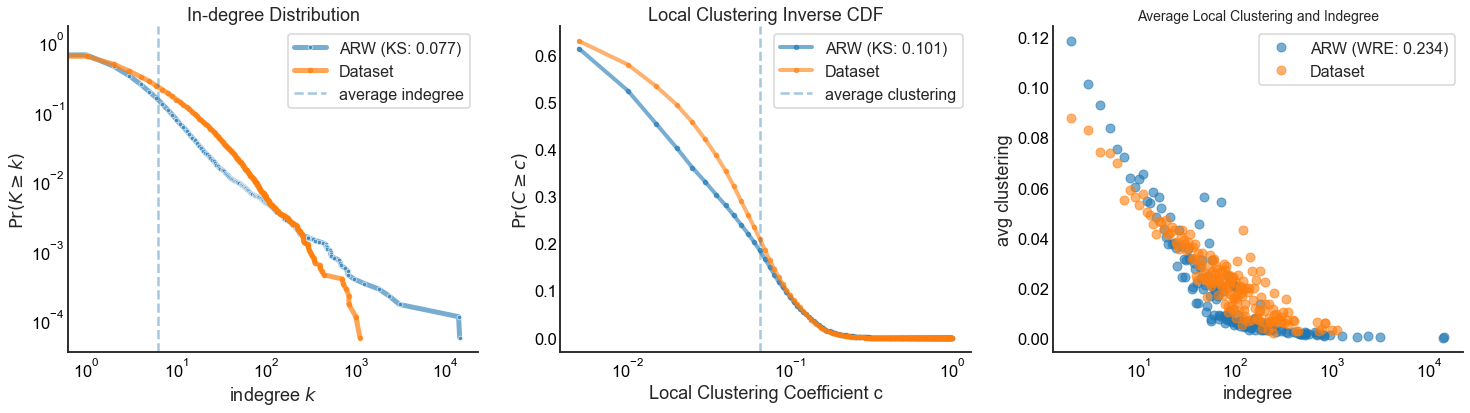

In [64]:
utils.plot_deg_and_cc_and_deg_cc([arw_graph.g, network], ['ARW', 'Dataset'], get_atty=network['attributed'])